In [1]:
#Importing libraries for exploratory data analysis
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
px_template = "simple_white"

In [5]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
     ------------------------------------ 385.0/385.0 MB 390.5 kB/s eta 0:00:00
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
     ---------------------------------------- 1.1/1.1 MB 2.7 MB/s eta 0:00:00
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 3.0/3.0 MB 1.6 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
     -------------------------------------- 126.6/126.6 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 3.4 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#  **Data Understanding**

In this stage of the methodology getting familiar with the data is key. First importing
the data from relevant source, then reviewing the data to understand its structure and volume, data 
quality is also assessed by checking for missing values, checking for errors in the data, outlier and anomaly detection and 
general check on the quality of the data. 
<br>
Data content understanding is also performed, Examining data content to understand the meaning of each variable and its potential relevance to the project, also determining the relationships between different variables and identify key features that will be important for analysis.


In [2]:
#Creating a list of all the objects in the dataframe
colms = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

In [3]:
#Importing the dataframe into the workspace
df = pd.read_csv(r"diabetes_012_health_indicators_BRFSS2015.csv",usecols=colms)

In [4]:
#Printing the column labels in the dataframe
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
#Setting a set of random variables with 5 rows of data as sample and data remains the
#same even if line is run multiple times
df.sample(random_state=42,n=5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
219620,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,7.0,0.0,0.0,7.0,4.0,2.0
132821,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
151862,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0
139717,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,3.0,0.0,0.0,1.0,2.0,4.0,7.0
239235,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,27.0,27.0,1.0,0.0,8.0,3.0,2.0


In [6]:
print(df.dtypes)

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [7]:
#Generating descriptive statistics of data in the dataframe
df.describe(include='float64')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
#checking for null values
df.isnull().sum()
#no null values

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
#checking shape and dimensionality of the dataframe
print(f"Data shape:{df.shape}")
print(f"Data dimension:{df.ndim}")

Data shape:(253680, 22)
Data dimension:2


In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Data Cleaning and PreProcessing

In [11]:
data_clean = df.copy()

In [12]:
data_clean.isna().sum() # No null values

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [13]:
unique_values = {}
for colm in data_clean.columns:
  unique_values[colm] = data_clean[colm].value_counts().shape[0]

# Create the DataFrame with lowercase 'dataframe'
df = pd.DataFrame(unique_values, index=['unique value count']).transpose()


In [14]:
unique_values

{'Diabetes_012': 3,
 'HighBP': 2,
 'HighChol': 2,
 'CholCheck': 2,
 'BMI': 84,
 'Smoker': 2,
 'Stroke': 2,
 'HeartDiseaseorAttack': 2,
 'PhysActivity': 2,
 'Fruits': 2,
 'Veggies': 2,
 'HvyAlcoholConsump': 2,
 'AnyHealthcare': 2,
 'NoDocbcCost': 2,
 'GenHlth': 5,
 'MentHlth': 31,
 'PhysHlth': 31,
 'DiffWalk': 2,
 'Sex': 2,
 'Age': 13,
 'Education': 6,
 'Income': 8}

In [15]:
data_clean.duplicated().sum() # duplicates present in our dataset

23899

In [16]:
# dropping 23899 duplicate rows from the dataset 
data_clean.drop_duplicates(inplace = True)

In [17]:
data_clean.shape

(229781, 22)

In [18]:
#statistical information  on every column
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


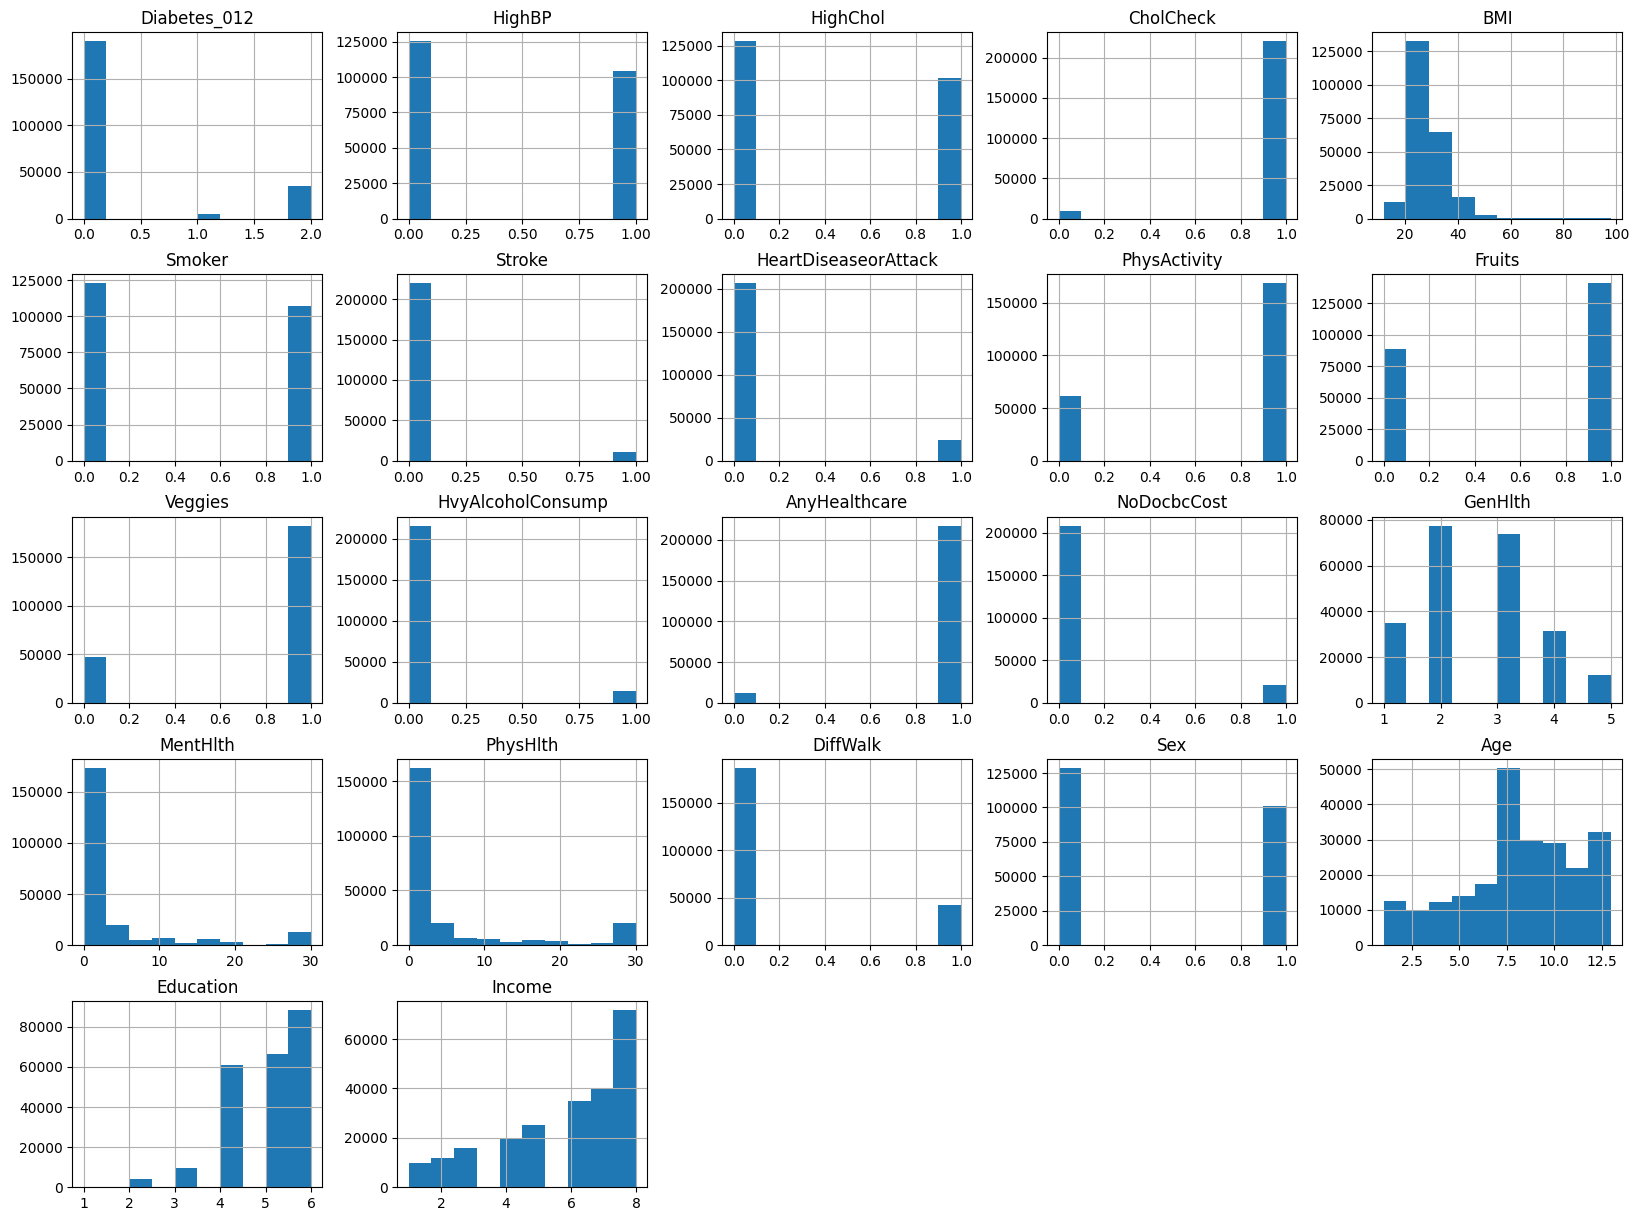

In [19]:
#understanding each column of the dataset eith a hisotgram
data_clean.hist(figsize=(20,15));

In [20]:
#finding correlations between columns in the dataset
data_clean.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.261976,0.203327,0.075701,0.212027,0.046774,0.100276,0.170816,-0.103408,-0.025462,...,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,-0.107742,-0.147102
HighBP,0.261976,1.000000,0.284186,0.111220,0.194126,0.074237,0.124426,0.201271,-0.104131,-0.019329,...,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,-0.112676,-0.139782
HighChol,0.203327,0.284186,1.000000,0.094753,0.089615,0.074627,0.089258,0.176279,-0.063266,-0.026125,...,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,-0.049838,-0.061871
CholCheck,0.075701,0.111220,0.094753,1.000000,0.042420,-0.003776,0.027894,0.049995,-0.004409,0.017973,...,0.115539,-0.054198,0.062782,-0.001549,0.040612,0.048969,-0.024255,0.095996,-0.009758,0.002161
BMI,0.212027,0.194126,0.089615,0.042420,1.000000,-0.009196,0.011062,0.039926,-0.127864,-0.067528,...,-0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,-0.049347,-0.074568,-0.069192
Smoker,0.046774,0.074237,0.074627,-0.003776,-0.009196,1.000000,0.054438,0.105154,-0.066981,-0.061947,...,-0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,-0.135793,-0.095418
Stroke,0.100276,0.124426,0.089258,0.027894,0.011062,0.054438,1.000000,0.198863,-0.059440,-0.004613,...,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,-0.064319,-0.117232
HeartDiseaseorAttack,0.170816,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,1.000000,-0.073267,-0.007128,...,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,-0.082466,-0.122908
PhysActivity,-0.103408,-0.104131,-0.063266,-0.004409,-0.127864,-0.066981,-0.059440,-0.073267,1.000000,0.125283,...,0.024095,-0.046620,-0.237676,-0.106175,-0.199562,-0.235943,0.033586,-0.087539,0.171224,0.166171
Fruits,-0.025462,-0.019329,-0.026125,0.017973,-0.067528,-0.061947,-0.004613,-0.007128,0.125283,1.000000,...,0.022756,-0.032521,-0.071433,-0.052409,-0.024744,-0.030188,-0.088628,0.073726,0.085174,0.051230


Text(0.5, 1.0, 'correlation of features')

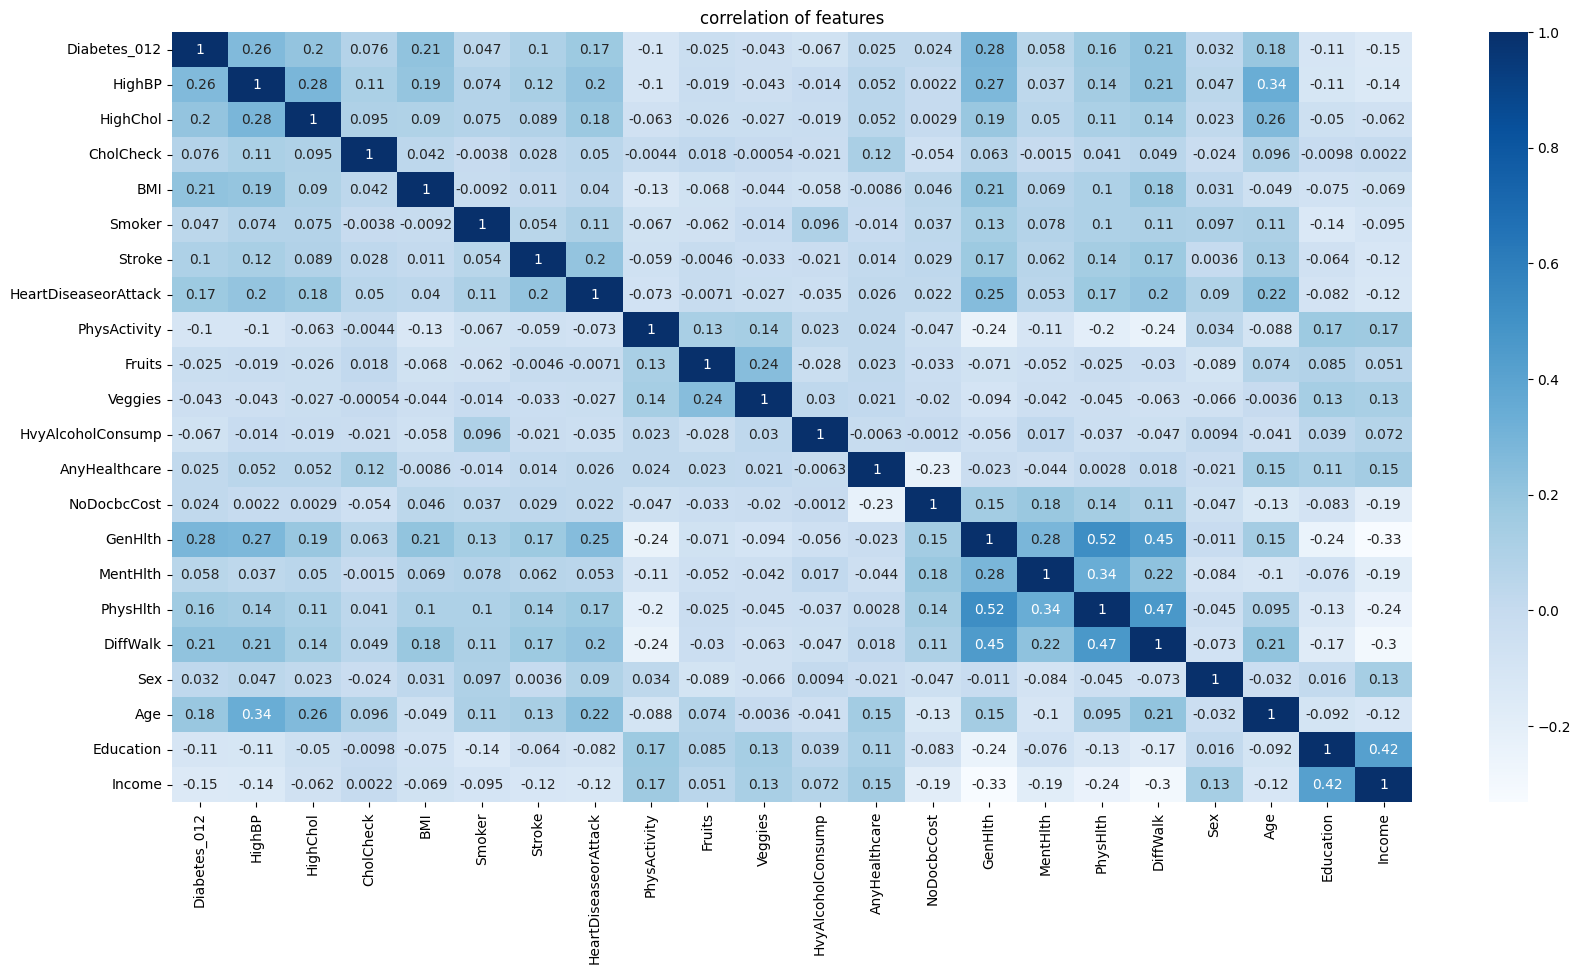

In [21]:
#using heatmap to give a visual understanding of the correlation

plt.figure(figsize = (20,10))
sns.heatmap(data_clean.corr(),annot=True , cmap ='Blues')
plt.title("correlation of features")

## Observations

1) There is a positive correlation between BMI and CholCheck (0.8). This means that people with a higher body mas index tend to have higher cholesterol levels.
<br>
2) There is a negative correlation between Fruits and HvyAlcoholConsump, this means that people who eat more fruits are less likely to consume a lot of alcohol
<br>
3) There is a negative correlation between AnyHealthcare and NoDocbcCost, This means that people who have health insurance are less likely to have high out-of-pocket medical costs


## Correlation of features with target column

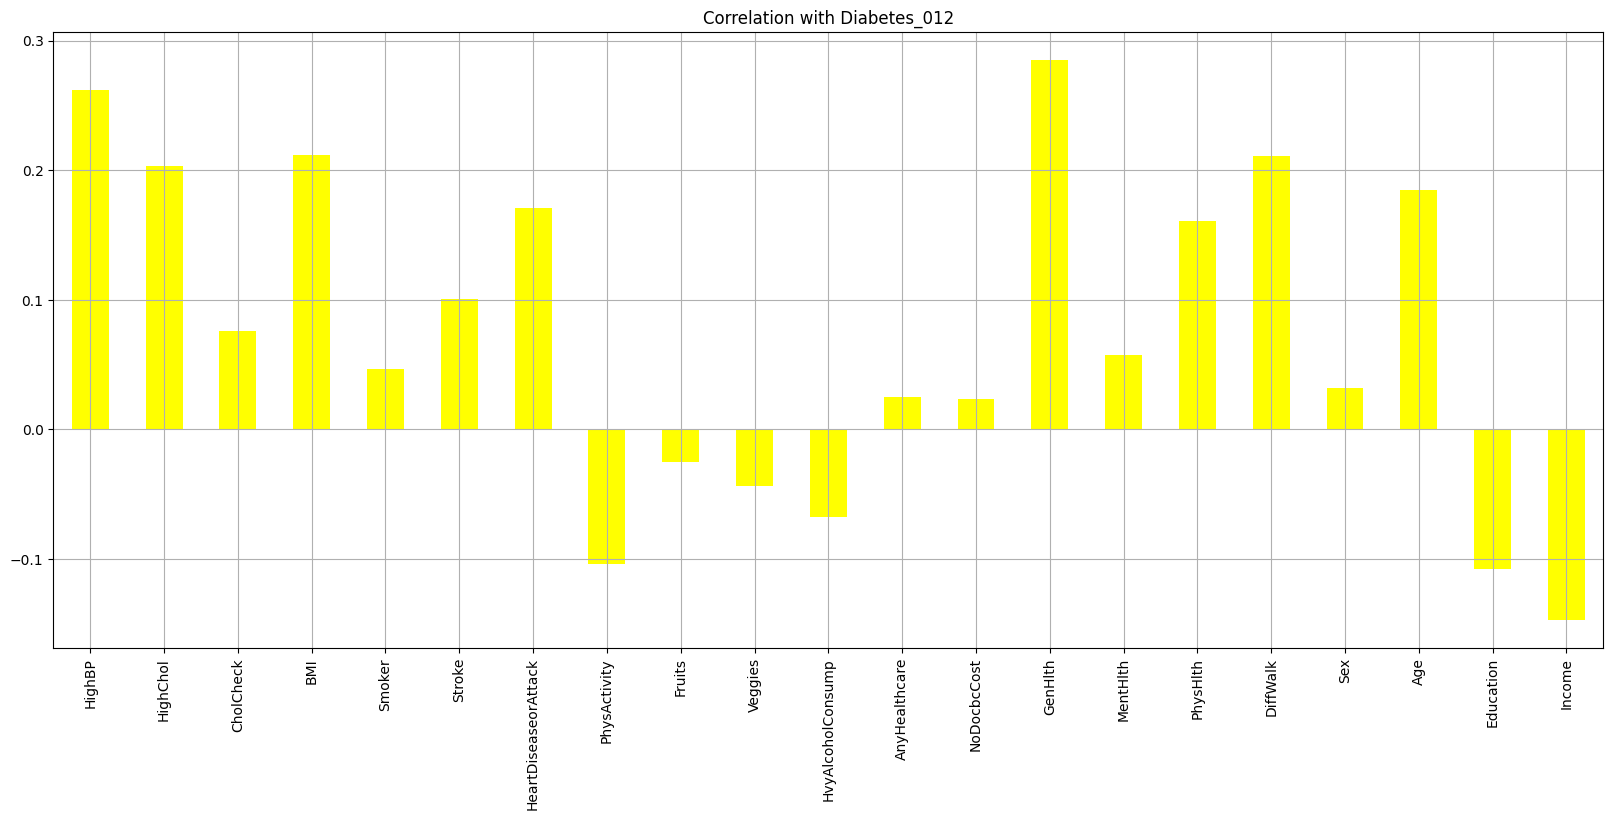

In [22]:
data_clean.drop('Diabetes_012', axis=1).corrwith(data_clean.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_012",color="Yellow");

## Correlation of features with target

### Observations
1) AnyHealthcare, NoDocbccost, Fruit and sex are least correlated with Diabetes_binary
2) The rest of the features have significant correlation with target Diabetes_012

In [23]:
# in data there are 3 unique values  0 is for no diabetes or only during pregnancy, 
#1 is for prediabetes, and 2 is for diabetes
#Replacing 2 to 1 so we can have just two values in Diabetes_target  
#adding new column Diabetes_target  

data_clean["Diabetes_target"]= data_clean["Diabetes_012"].replace({2:"1"})

In [24]:
data_clean['Diabetes_target'].value_counts()

Diabetes_target
0.0    190055
1       35097
1.0      4629
Name: count, dtype: int64

In [25]:
#converting new column to integer
data_clean['Diabetes_target'] = data_clean['Diabetes_target'].astype(int)

target_unqval = data_clean['Diabetes_target'].unique()
print(f"Unique values in the target column: {target_unqval}")

Unique values in the target column: [0 1]


In [26]:
data_clean['Diabetes_target'].value_counts()
# 0 for no Diabetes person and 1 for Diabetes

Diabetes_target
0    190055
1     39726
Name: count, dtype: int64

<Axes: xlabel='Diabetes_target', ylabel='count'>

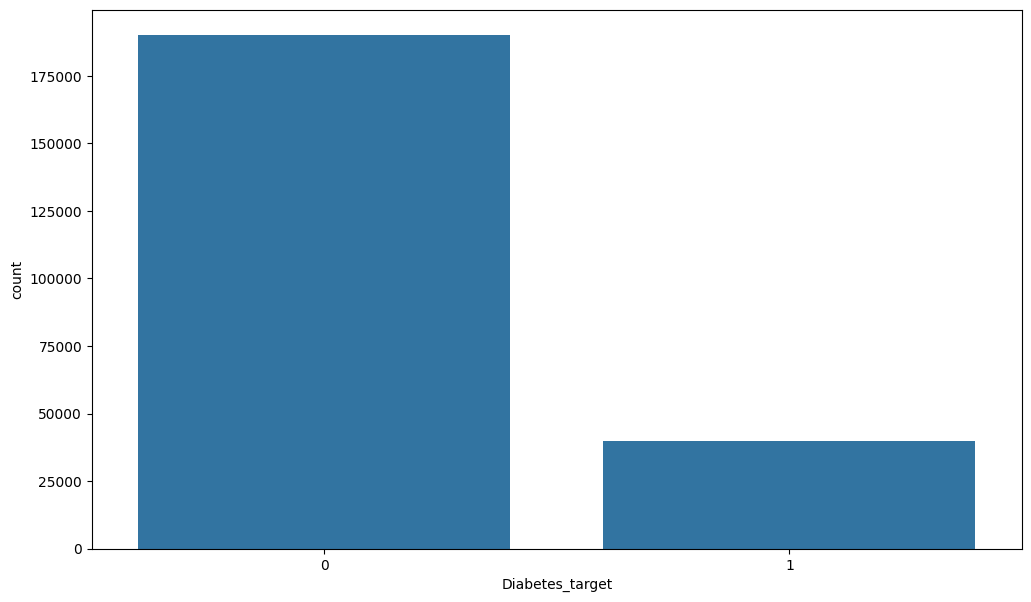

In [27]:
#value count of Diabetes_target by using countplot
warnings.filterwarnings('ignore')

plt.figure(figsize = (12, 7))
sns.countplot(x = 'Diabetes_target', data = data_clean)


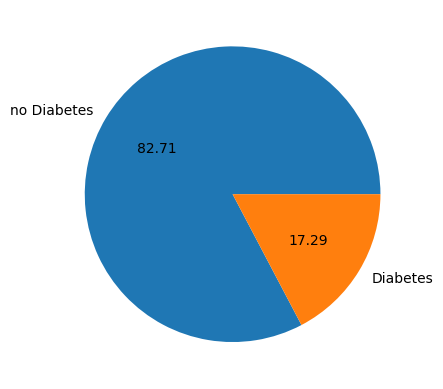

In [28]:
#visualizing diabetes average with pie chat

labels=["no Diabetes","Diabetes"]

plt.pie(data_clean["Diabetes_target"].value_counts() , labels =labels ,autopct='%.02f' );

## Comparing important features with target column

#### HighBP & HighChol are major factors contributing to diabetes according to the data set. Individual relations will be identified then combined relations will also be applied.

## HighBP's Relation with Diabetes_target

Diabetes_target,0,1
HighBP,,
0.0,114950,10409
1.0,75105,29317


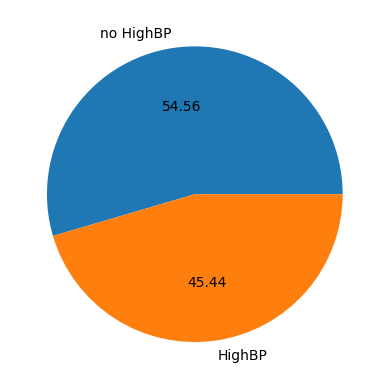

In [29]:
#pie plot of percentage people with HighBP or no HighBP

labels=["no HighBP","HighBP"]

plt.pie(data_clean["HighBP"].value_counts() , labels =labels ,autopct='%.02f' );

#number of Diabetes patient with HighBP

pd.crosstab(data_clean.HighBP,data_clean.Diabetes_target)


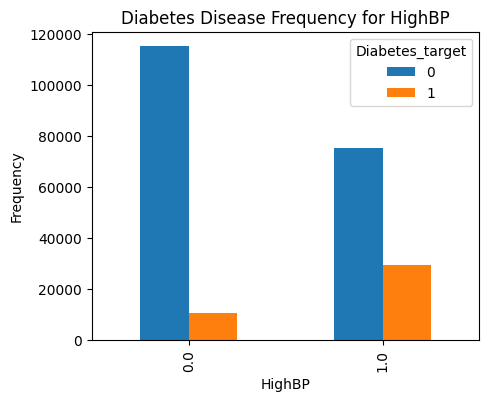

In [30]:
#Showing The relation Between HighBP and Diabetes

pd.crosstab(data_clean.HighBP,data_clean.Diabetes_target).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()

In [31]:
# checking average of diabetic persons with HighBP and NO HighBP
# Cross-tabulation of Diabetes_target and HighBP with normalization by rows
crosstab = pd.crosstab(data_clean['Diabetes_target'], data_clean['HighBP'], normalize='index') * 100

# Rename the columns for clarity
crosstab.columns = ['No HighBP', 'HighBP']

print(crosstab)

                 No HighBP     HighBP
Diabetes_target                      
0                60.482492  39.517508
1                26.201984  73.798016


#### In Conclusion:
HighBP significantly influences diabetes. An increase in high blood pressure cases is associated with a rise in diabetes cases.

## HighChol's Relation with Diabetes_target

Diabetes_target,0,1
HighChol,,
0.0,114917,13356
1.0,75138,26370


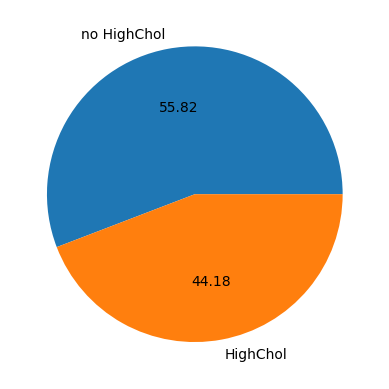

In [32]:
#pie plot of percentage people with HighChol or no HighChol

labels=["no HighChol","HighChol"]

plt.pie(data_clean["HighChol"].value_counts() , labels =labels ,autopct='%.02f' );

#number of Diabetes patient with HighChol

pd.crosstab(data_clean.HighChol,data_clean.Diabetes_target)


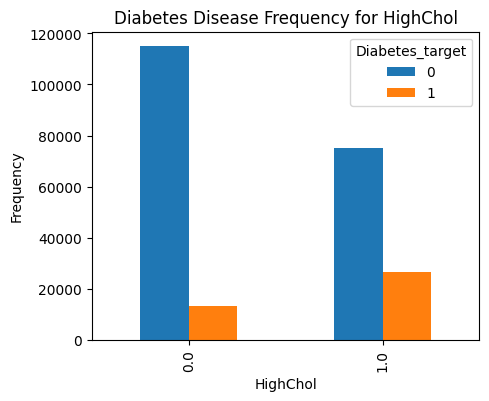

In [33]:
#Showing The relation Between HighChol and Diabetes

pd.crosstab(data_clean.HighChol,data_clean.Diabetes_target).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for HighChol')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()

In [34]:
# checking average of diabetic persons with HighChol and NO HighChol
# Cross-tabulation of Diabetes_target and HighChol with normalization by rows
crosstab = pd.crosstab(data_clean['Diabetes_target'], data_clean['HighChol'], normalize='index') * 100

# Rename the columns for clarity
crosstab.columns = ['No HighChol', 'HighChol']

print(crosstab)

                 No HighChol   HighChol
Diabetes_target                        
0                  60.465129  39.534871
1                  33.620299  66.379701


## Combined effects of HighChol and HighBP

In [35]:

# Create a cross-tabulation for Diabetes_target, HighChol, and HighBP
crosstab_cholbp = pd.crosstab([data_clean['Diabetes_target']], [data_clean['HighChol'], data_clean['HighBP']], normalize='index') * 100

# Rename the columns for clarity
crosstab_cholbp.columns = ['No HighChol & No HighBP', 'No HighChol & HighBP', 'HighChol & No HighBP', 'HighChol & HighBP']

print(crosstab_cholbp)


                 No HighChol & No HighBP  No HighChol & HighBP  \
Diabetes_target                                                  
0                              42.629239             17.835890   
1                              12.858078             20.762221   

                 HighChol & No HighBP  HighChol & HighBP  
Diabetes_target                                           
0                           17.853253          21.681618  
1                           13.343906          53.035795  


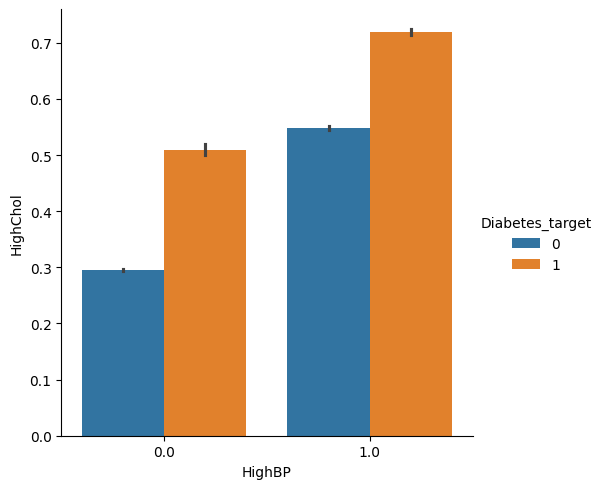

In [36]:
data_clean["Diabetes_target"] = data_clean["Diabetes_target"].astype(str)
sns.catplot(x="HighBP", y="HighChol", data=data_clean, hue="Diabetes_target", kind="bar");


### Observations
1) a combined effect of HighBP and HighChol will increase the likelyhood of diabetes

## Relationship between Diabetes and Social Habits (Smoker & HvyAlcoholConsump)

## Smoker's relation with Diabetes_target

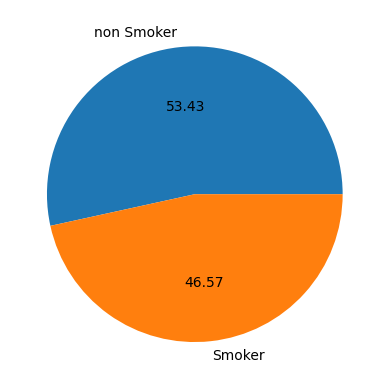

In [37]:
#Smokers and non Smokers average using pie chart
labels=["non Smoker","Smoker"]

plt.pie(data_clean["Smoker"].value_counts() , labels =labels ,autopct='%.02f' );

In [38]:
# diabetic persons who are Smokers or Non Smoker

pd.crosstab(data_clean.Smoker,data_clean.Diabetes_target)

Diabetes_target,0,1
Smoker,,
0.0,103559,19222
1.0,86496,20504


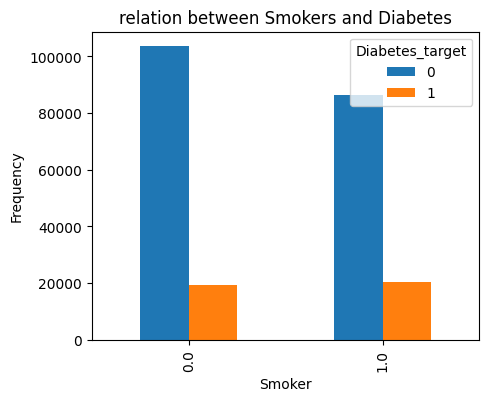

In [39]:
#relation between Smokers and Diabetes

pd.crosstab(data_clean.Smoker,data_clean.Diabetes_target).plot(kind="bar",figsize=(5,4))

plt.title('relation between Smokers and Diabetes')
plt.xlabel("Smoker")
plt.ylabel('Frequency')
plt.show()

### Observations
1) smoking alone has a minor effect on Diabetes

## HvyAlcoholConsump relation with Diabetes_target

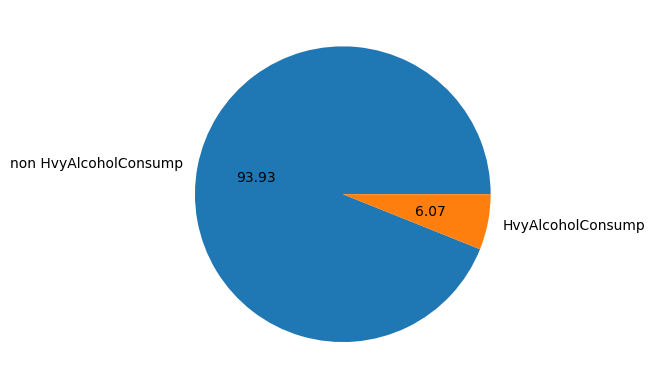

In [40]:
#HvyAlcoholConsump and non HvyAlcoholConsump average using pie chart
labels=["non HvyAlcoholConsump","HvyAlcoholConsump"]

plt.pie(data_clean["HvyAlcoholConsump"].value_counts() , labels =labels ,autopct='%.02f' );

In [41]:
# diabetic persons who are HvyAlcoholConsump or Non HvyAlcoholConsump

pd.crosstab(data_clean.HvyAlcoholConsump,data_clean.Diabetes_target)

Diabetes_target,0,1
HvyAlcoholConsump,,
0.0,177145,38686
1.0,12910,1040


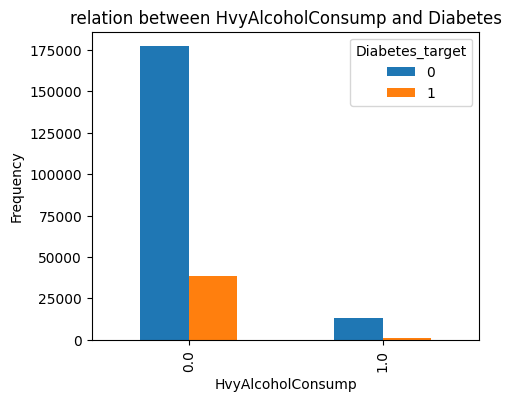

In [42]:
#relation between HvyAlcoholConsump and Diabetes

pd.crosstab(data_clean.HvyAlcoholConsump,data_clean.Diabetes_target).plot(kind="bar",figsize=(5,4))

plt.title('relation between HvyAlcoholConsump and Diabetes')
plt.xlabel("HvyAlcoholConsump")
plt.ylabel('Frequency')
plt.show()

### Observations
1) there isn't enough information of HvyAlcoholConsump in the data making it difficult to use it for prediction

## Combined effects of Smoker and HvyAlcoholConsump

In [43]:
(data_clean.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_target"].value_counts()/data_clean.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_target"].count())*100

Smoker  HvyAlcoholConsump  Diabetes_target
0.0     0.0                0                  83.929601
                           1                  16.070399
        1.0                0                  94.487047
                           1                   5.512953
1.0     0.0                0                  79.841635
                           1                  20.158365
        1.0                0                  91.517808
                           1                   8.482192
dtype: float64

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

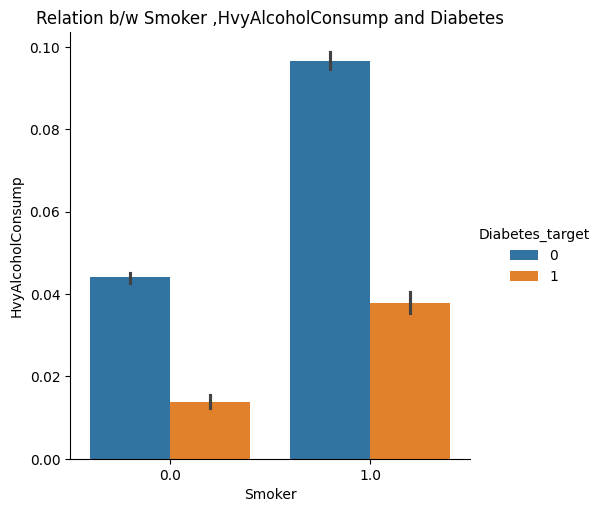

In [44]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data_clean , hue="Diabetes_target"  , kind="bar"  );  
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

## Outlier Detection and Correction

#### using Boxplot

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]),
 [Text(1, 0, 'Diabetes_012'),
  Text(2, 0, 'HighBP'),
  Text(3, 0, 'HighChol'),
  Text(4, 0, 'CholCheck'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'Smoker'),
  Text(7, 0, 'Stroke'),
  Text(8, 0, 'HeartDiseaseorAttack'),
  Text(9, 0, 'PhysActivity'),
  Text(10, 0, 'Fruits'),
  Text(11, 0, 'Veggies'),
  Text(12, 0, 'HvyAlcoholConsump'),
  Text(13, 0, 'AnyHealthcare'),
  Text(14, 0, 'NoDocbcCost'),
  Text(15, 0, 'GenHlth'),
  Text(16, 0, 'MentHlth'),
  Text(17, 0, 'PhysHlth'),
  Text(18, 0, 'DiffWalk'),
  Text(19, 0, 'Sex'),
  Text(20, 0, 'Age'),
  Text(21, 0, 'Education'),
  Text(22, 0, 'Income')])

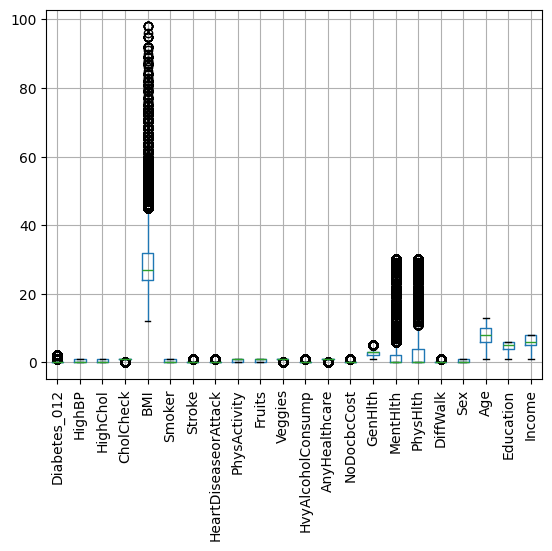

In [45]:
# Check data for Outliers
data_clean.boxplot()
plt.xticks(rotation=90)

In [46]:
#Removing outliers
data_clean.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_target'],
      dtype='object')

In [47]:
data_clean['Diabetes_target'].value_counts()

Diabetes_target
0    190055
1     39726
Name: count, dtype: int64

In [48]:
data_clean['Diabetes_target'] = data_clean['Diabetes_target'].astype('float64')

In [50]:
def outliers():
    l = [ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
    for i in l:
        x = np.quantile(data_clean[i],[0.25,0.75])
        iqr = x[1]-x[0]    # Interquartile range
        lof = x[0]-1.5*iqr   # lower_fence
        upf = x[1]+1.5*iqr   # upper_fence
        data_clean[i] = np.where(data_clean[i]>upf,upf,(np.where(data_clean[i]<lof,lof,data_clean[i])))
outliers()

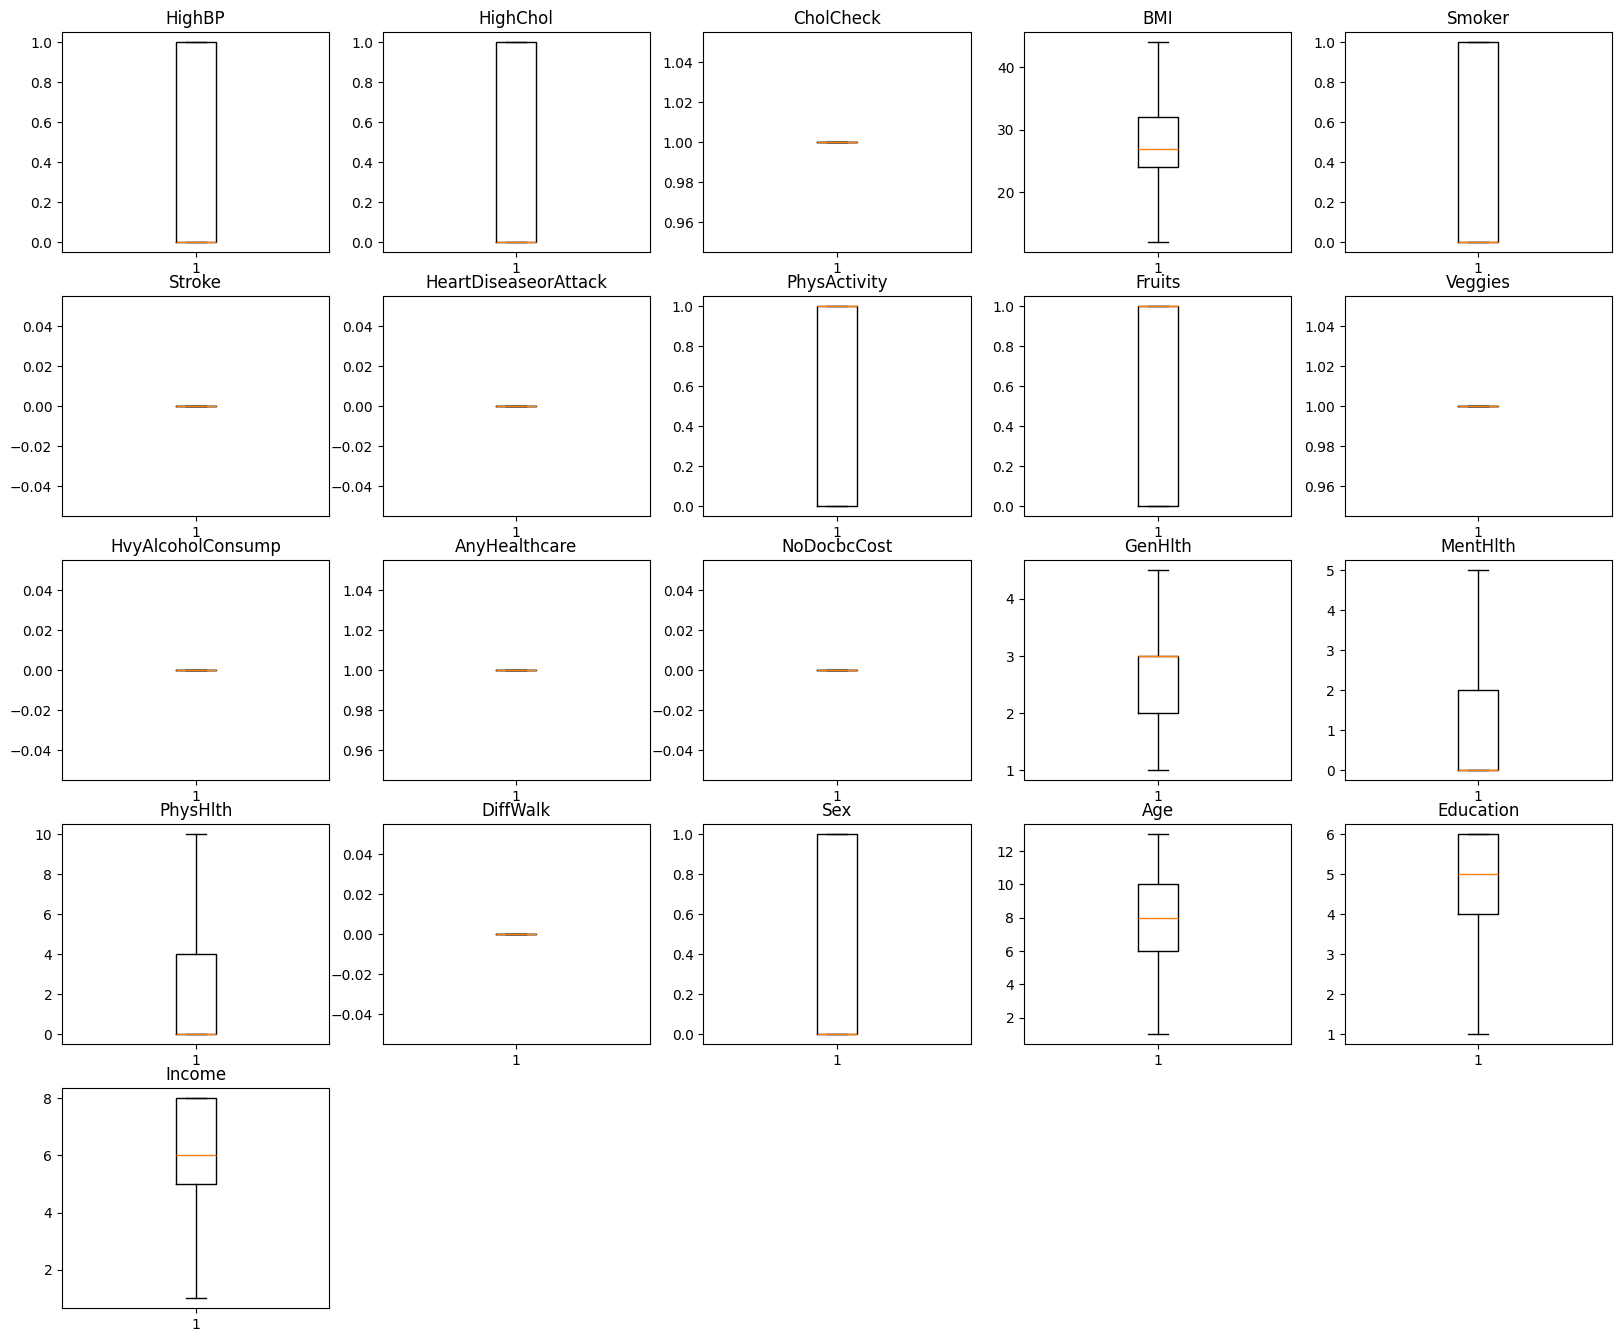

In [51]:
# checking again to see if outliers persists after removal
out = 1
plt.figure(figsize=(20,20))
for i in ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education','Income']:
    if out<23:
        plt.subplot(6,5,out)
        plt.boxplot(data_clean[i])
        plt.title(i)
        out=out+1

### Observations
1) The likelihood of developing diabetes is equally distributed between males and females.
2) Higher levels of education correlate with a decrease in the prevalence of diabetes.
3) Individuals over the age of 45 are at a higher risk for diabetes compared to younger people; as age increases, so does the incidence of diabetes.
4) Those with lower income levels are more susceptible to diabetes than those with higher incomes.
5) There is minimal difference in fruit and vegetable consumption among diabetes patients.


# Data Modelling

In [52]:
X = data_clean.iloc[: ,1:22]
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.5,5.0,10.0,0.0,0.0,9.0,4.0,3.0
1,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.5,5.0,10.0,0.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,44.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [53]:
y = data_clean.iloc[:,-1]
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    1.0
253677    0.0
253678    0.0
253679    1.0
Name: Diabetes_target, Length: 229781, dtype: float64

<Axes: title={'center': 'Value Distribution'}, xlabel='Diabetes_target'>

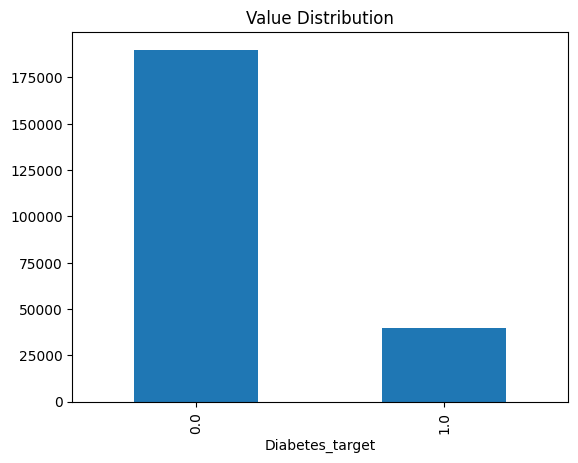

In [54]:
data_clean['Diabetes_target'].value_counts()
data_clean['Diabetes_target'].value_counts().plot(kind = 'bar', title = 'Value Distribution')

#### The data is Imbalanced

## Over Sampling

<Axes: title={'center': 'value Distribution after Oversampling'}, xlabel='Diabetes_target'>

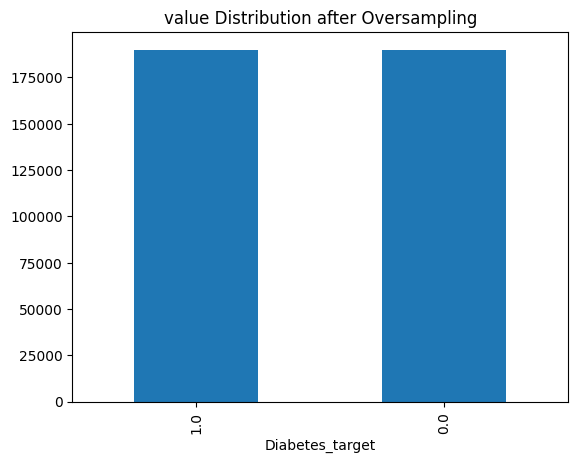

In [55]:
# over sampling of the dataset to get a balanced dataset
value_0 = data_clean[data_clean['Diabetes_target'] == 0]
value_1 = data_clean[data_clean['Diabetes_target'] == 1]

# over sampling of the minority value 1
value_1_over = value_1.sample(len(value_0), replace=True)

# Creating a new dataframe with over sampled value 1 data and value 0 data
data_sampled = pd.concat([value_1_over, value_0], axis=0)

# plotting the new label distribution
data_sampled['Diabetes_target'].value_counts().plot(kind='bar', title='value Distribution after Oversampling')

In [56]:
y = data_sampled.iloc[:,-1]
y

145141    1.0
41872     1.0
170226    1.0
108027    1.0
229876    1.0
         ... 
253673    0.0
253674    0.0
253675    0.0
253677    0.0
253678    0.0
Name: Diabetes_target, Length: 380110, dtype: float64

In [57]:
X = data_sampled.iloc[: ,1:22]
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
145141,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,5.0,10.0,0.0,0.0,8.0,5.0,2.0
41872,1.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,4.0,0.0,0.0,12.0,6.0,7.0
170226,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,5.0,4.0
108027,1.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
229876,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,5.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,1.0,1.0,1.0,44.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [59]:
X

array([[ 0.87332593,  0.94388834,  0.        , ..., -0.2012643 ,
         0.1095367 , -1.66922411],
       [ 0.87332593, -1.05944735,  0.        , ...,  1.17972958,
         1.08306816,  0.6361702 ],
       [ 0.87332593,  0.94388834,  0.        , ...,  0.14398417,
         0.1095367 , -0.74706639],
       ...,
       [ 0.87332593,  0.94388834,  0.        , ..., -1.23700971,
         1.08306816,  0.6361702 ],
       [-1.14504787, -1.05944735,  0.        , ..., -2.27275512,
         0.1095367 , -1.66922411],
       [ 0.87332593, -1.05944735,  0.        , ..., -0.54651277,
         0.1095367 , -2.13030297]])

## Splitting the dataset into the Training set and Test set

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [61]:
X_train.shape

(266077, 21)

In [62]:
X_test.shape

(114033, 21)

## Building an Artificial Neural Network (ANN) model using Keras

In [62]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape = (21, )))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
          
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 


In [64]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325,321 (1.24 MB)

 Trainable params: 325,321 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling and training the ANN model

In [65]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics = ['accuracy'])

In [66]:
hist = model.fit(X_train, y_train, batch_size=32, epochs= 25)

Epoch 1/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 78s 9ms/step - accuracy: 0.7253 - loss: 0.5439
Epoch 2/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 84s 10ms/step - accuracy: 0.7336 - loss: 0.5363
Epoch 3/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 86s 10ms/step - accuracy: 0.7322 - loss: 0.5366
Epoch 4/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - accuracy: 0.7333 - loss: 0.5354
Epoch 5/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 71s 9ms/step - accuracy: 0.7356 - loss: 0.5315
Epoch 6/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 89s 11ms/step - accuracy: 0.7353 - loss: 0.5322
Epoch 7/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 89s 11ms/step - accuracy: 0.7369 - loss: 0.5301
Epoch 8/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 90s 11ms/step - accuracy: 0.7375 - loss: 0.5290
Epoch 9/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 89s 11ms/step - accuracy: 0.7380 - loss: 0.5297
Epoch 10/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 88s 11ms/step - accuracy: 0.7380 - loss: 0.5285
Epoch 11/25
8315/8315 ━━━━━━━━━━━━━━━━━━━━ 83s 10ms/step - accuracy: 0.7411 - loss: 0.5252
Epoch 12/25

In [ ]:
y_pred = model.predict(X_test)
# Save the model
model.save("binary_classification_model_for_diabetes.h5")


In [53]:
y_pred = (y_pred > 0.5)
y_pred 

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

## Evaluating trained model performance

In [69]:
hist.history.keys()

dict_keys(['accuracy', 'loss'])

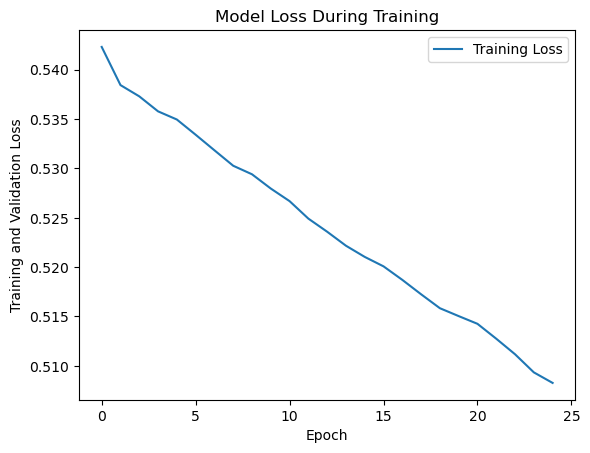

In [70]:
plt.plot(hist.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

Text(0.5, 23.52222222222222, 'Predicted label')

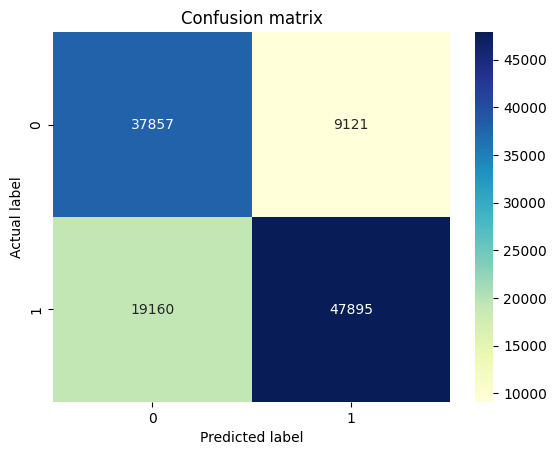

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     57017
         1.0       0.72      0.81      0.76     57016

    accuracy                           0.75    114033
   macro avg       0.75      0.75      0.75    114033
weighted avg       0.75      0.75      0.75    114033



## Building the SVM Model

In [73]:
# Splitting the dataset into training and testing sets.
y = data_sampled.iloc[:,-1]
x = data_sampled.iloc[: ,1:22]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [75]:
# Creating the SVM model.
model = svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7319986319749546


In [77]:
confusion_matrix(y_test,y_pred)

array([[25155, 12605],
       [ 7769, 30493]], dtype=int64)

## Applying Other Models for Purpose of Performance Comparison



## Training a Logistic Model 

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [83]:
# predict the score of the trained model using the testing dataset
result = LR.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7283681039699035


In [86]:
# making predictions on the test data
y_pred = LR.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72     37983
         1.0       0.72      0.75      0.73     38039

    accuracy                           0.73     76022
   macro avg       0.73      0.73      0.73     76022
weighted avg       0.73      0.73      0.73     76022



Text(0.5, 23.52222222222222, 'Predicted label')

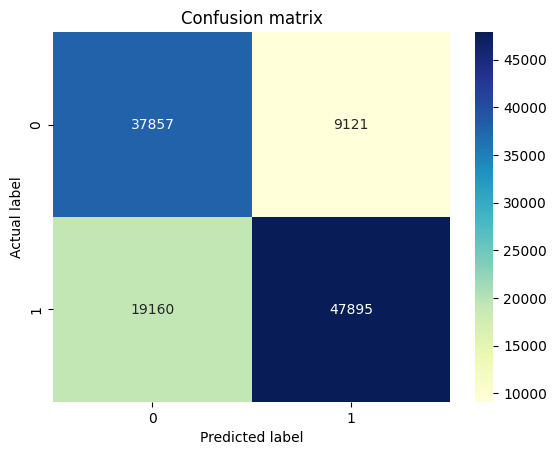

In [55]:
conmat = confusion_matrix(y_pred,y_test)
sns.heatmap(conmat, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')